In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
font = {'size'   : 14}
matplotlib.rc('font', **font)
import pickle

In [2]:
MFD = np.genfromtxt('myocardium/Stress relaxation/MFD.csv', delimiter=',')
extras = np.linspace(0,81,10, dtype=int) # remove some points from MFD to make the two equal size
MFD = [MFD[i] for i in range(MFD.shape[0]) if i not in extras]
MFD = np.array(MFD)
MFD = MFD[:-1]
# MFD = MFD[1:]
MFD_time = np.hstack([np.linspace(0,MFD[0,0]*0.9,10), MFD[:,0]])
MFD_lmb_x = np.hstack([np.linspace(1,1.1,10), np.ones_like(MFD[:,0])*1.1])
MFD_lmb_y = 1/np.sqrt(MFD_lmb_x)
MFD_sgm_x = np.hstack([np.linspace(0,MFD[0,1]*0.9,10), MFD[:,1]])
MFD_sgm_y = np.zeros_like(MFD_sgm_x)
MFD = np.vstack([MFD_time,MFD_lmb_x,MFD_lmb_y,MFD_sgm_x,MFD_sgm_y]).T

CFD = np.genfromtxt('myocardium/Stress relaxation/CFD.csv', delimiter=',')
CFD = CFD[1:]
CFD_time = np.hstack([np.linspace(0,CFD[0,0]*0.9,10), CFD[:,0]])
CFD_lmb_y = np.hstack([np.linspace(1,1.1,10), np.ones_like(CFD[:,0])*1.1])
CFD_lmb_x = 1/np.sqrt(CFD_lmb_y)
CFD_sgm_y = np.hstack([np.linspace(0,CFD[0,1]*0.9,10), CFD[:,1]])
CFD_sgm_x = np.zeros_like(CFD_sgm_y)
CFD = np.vstack([CFD_time,CFD_lmb_x,CFD_lmb_y,CFD_sgm_x,CFD_sgm_y]).T

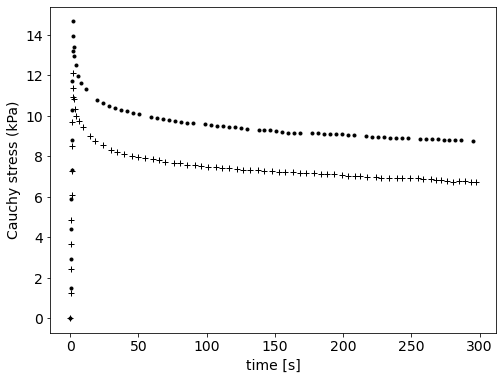

In [3]:
fig, ax = plt.subplots(figsize=(8,6))

ax.plot(MFD[:,0], MFD[:,3], 'k.', label='MFD')
ax.plot(CFD[:,0], CFD[:,4], 'k+', label='CFD')

ax.set(xlabel='time [s]', ylabel='Cauchy stress (kPa)'); 


with open('myocardium/Stress relaxation/MFD.npy', 'wb') as f:
    pickle.dump([MFD[:,0], MFD[:,1], MFD[:,2], MFD[:,3], MFD[:,4]], f)
with open('myocardium/Stress relaxation/CFD.npy', 'wb') as f:
    pickle.dump([CFD[:,0], CFD[:,1], CFD[:,2], CFD[:,3], CFD[:,4]], f)

comb = np.vstack([np.expand_dims(MFD, axis=0), np.expand_dims(CFD, axis=0)])
with open('myocardium/Stress relaxation/combined.npy', 'wb') as f:
    pickle.dump([comb[:,:,0], comb[:,:,1], comb[:,:,2], comb[:,:,3], comb[:,:,4]], f)

### Cyclic
#### MFD

In [17]:
# Cyclic loading
# 3mm/min
MFDupper = np.genfromtxt('myocardium/Cyclic/3mmmin/MFDupper.csv', delimiter=',')
MFDlower = np.genfromtxt('myocardium/Cyclic/3mmmin/MFDlower.csv', delimiter=',')
MFD = np.vstack([MFDupper, MFDlower])
lmb_x = MFD[:,0]
lmb_y = 1/np.sqrt(lmb_x)
sgm_x = MFD[:,1]
sgm_y = np.zeros_like(sgm_x)

#Original length (in MFD): 20 mm (Fig. 5(b))
#Elongation: 20*0.1=2mm
#Duration: 2*2mm/3mmmin = 1.3333 min = 80 sec
time = np.linspace(0,80, lmb_x.shape[0])
with open('myocardium/Cyclic/3mmmin/MFD.npy', 'wb') as f:
    pickle.dump([time, lmb_x, lmb_y, sgm_x, sgm_y], f)

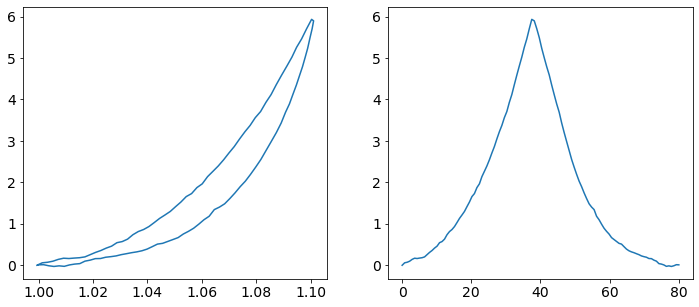

In [18]:
fig, ax = plt.subplots(1,2,figsize=(12,5))
ax[0].plot(lmb_x, sgm_x)
ax[1].plot(time, sgm_x)

In [21]:
# Cyclic loading
# 10mm/min
MFDupper = np.genfromtxt('myocardium/Cyclic/10mmmin/MFDupper.csv', delimiter=',')
MFDlower = np.genfromtxt('myocardium/Cyclic/10mmmin/MFDlower.csv', delimiter=',')
MFD = np.vstack([MFDupper, MFDlower])
lmb_x = MFD[:,0]
lmb_y = 1/np.sqrt(lmb_x)
sgm_x = MFD[:,1]
sgm_y = np.zeros_like(sgm_x)

#Original length (in MFD): 20 mm (Fig. 5(b))
#Elongation: 20*0.1=2mm
#Duration: 2*2mm/10mmmin = 0.4 min = 24 sec
time = np.linspace(0,24, lmb_x.shape[0])
with open('myocardium/Cyclic/10mmmin/MFD.npy', 'wb') as f:
    pickle.dump([time, lmb_x, lmb_y, sgm_x, sgm_y], f)

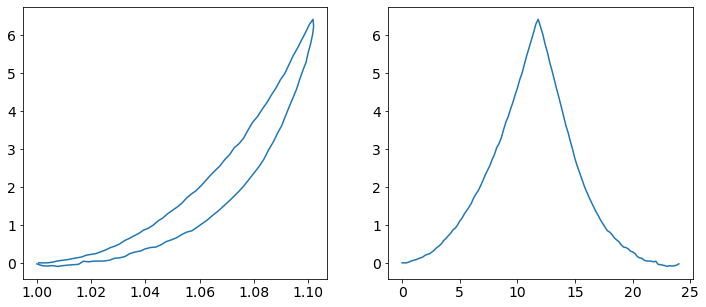

In [22]:
fig, ax = plt.subplots(1,2,figsize=(12,5))
ax[0].plot(lmb_x, sgm_x)
ax[1].plot(time, sgm_x)

In [25]:
# Cyclic loading
# 30mm/min
MFDupper = np.genfromtxt('myocardium/Cyclic/30mmmin/MFDupper.csv', delimiter=',')
MFDlower = np.genfromtxt('myocardium/Cyclic/30mmmin/MFDlower.csv', delimiter=',')
MFD = np.vstack([MFDupper, MFDlower])
lmb_x = MFD[:,0]
lmb_y = 1/np.sqrt(lmb_x)
sgm_x = MFD[:,1]
sgm_y = np.zeros_like(sgm_x)

#Original length (in MFD): 20 mm (Fig. 5(b))
#Elongation: 20*0.1=2mm
#Duration: 2*2mm/30mmmin = 0.1333 min = 8 sec
time = np.linspace(0,8, lmb_x.shape[0])
with open('myocardium/Cyclic/30mmmin/MFD.npy', 'wb') as f:
    pickle.dump([time, lmb_x, lmb_y, sgm_x, sgm_y], f)

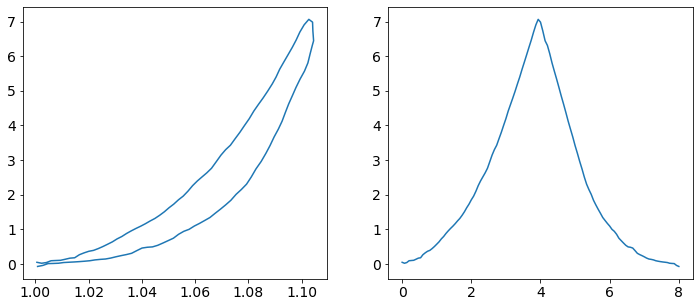

In [26]:
fig, ax = plt.subplots(1,2,figsize=(12,5))
ax[0].plot(lmb_x, sgm_x)
ax[1].plot(time, sgm_x)

#### CFD

In [29]:
# Cyclic loading
# 3mm/min
CFDupper = np.genfromtxt('myocardium/Cyclic/3mmmin/CFDupper.csv', delimiter=',')
CFDlower = np.genfromtxt('myocardium/Cyclic/3mmmin/CFDlower.csv', delimiter=',')
CFD = np.vstack([CFDupper, CFDlower])
lmb_x = CFD[:,0]
lmb_y = 1/np.sqrt(lmb_x)
sgm_x = CFD[:,1]
sgm_y = np.zeros_like(sgm_x)

#Original length (in CFD): 10 mm (Fig. 5(b))
#Elongation: 10*0.1=1mm
#Duration: 2*1mm/3mmmin = 40 sec
time = np.linspace(0,40, lmb_x.shape[0])
with open('myocardium/Cyclic/3mmmin/CFD.npy', 'wb') as f:
    pickle.dump([time, lmb_x, lmb_y, sgm_x, sgm_y], f)

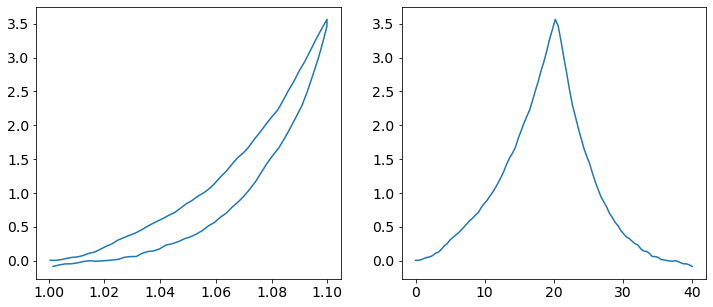

In [30]:
fig, ax = plt.subplots(1,2,figsize=(12,5))
ax[0].plot(lmb_x, sgm_x)
ax[1].plot(time, sgm_x)

In [31]:
# Cyclic loading
# 10mm/min
CFDupper = np.genfromtxt('myocardium/Cyclic/10mmmin/CFDupper.csv', delimiter=',')
CFDlower = np.genfromtxt('myocardium/Cyclic/10mmmin/CFDlower.csv', delimiter=',')
CFD = np.vstack([CFDupper, CFDlower])
lmb_x = CFD[:,0]
lmb_y = 1/np.sqrt(lmb_x)
sgm_x = CFD[:,1]
sgm_y = np.zeros_like(sgm_x)

#Original length (in CFD): 10 mm (Fig. 5(b))
#Elongation: 10*0.1=1mm
#Duration: 2*1mm/10mmmin = 12 sec
time = np.linspace(0,12, lmb_x.shape[0])
with open('myocardium/Cyclic/10mmmin/CFD.npy', 'wb') as f:
    pickle.dump([time, lmb_x, lmb_y, sgm_x, sgm_y], f)

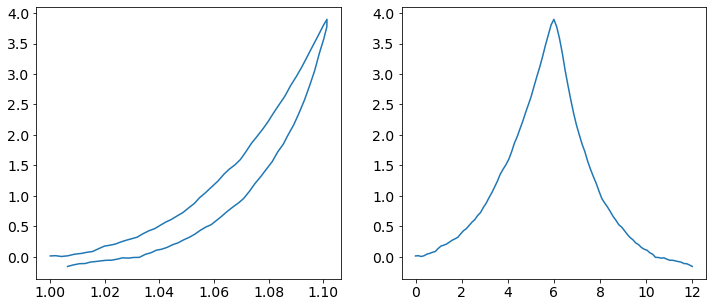

In [32]:
fig, ax = plt.subplots(1,2,figsize=(12,5))
ax[0].plot(lmb_x, sgm_x)
ax[1].plot(time, sgm_x)

In [33]:
# Cyclic loading
# 30mm/min
CFDupper = np.genfromtxt('myocardium/Cyclic/30mmmin/CFDupper.csv', delimiter=',')
CFDlower = np.genfromtxt('myocardium/Cyclic/30mmmin/CFDlower.csv', delimiter=',')
CFD = np.vstack([CFDupper, CFDlower])
lmb_x = CFD[:,0]
lmb_y = 1/np.sqrt(lmb_x)
sgm_x = CFD[:,1]
sgm_y = np.zeros_like(sgm_x)

#Original length (in CFD): 10 mm (Fig. 5(b))
#Elongation: 10*0.1=1mm
#Duration: 2*1mm/30mmmin = 4 sec
time = np.linspace(0,4, lmb_x.shape[0])
with open('myocardium/Cyclic/30mmmin/CFD.npy', 'wb') as f:
    pickle.dump([time, lmb_x, lmb_y, sgm_x, sgm_y], f)

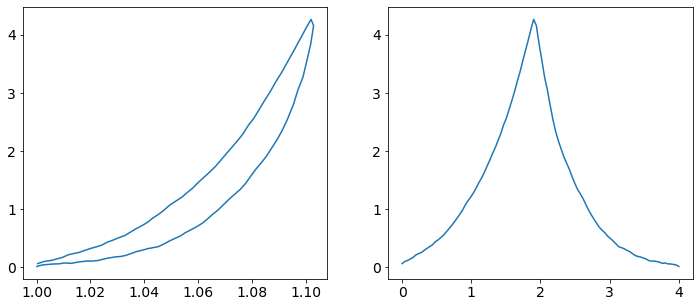

In [34]:
fig, ax = plt.subplots(1,2,figsize=(12,5))
ax[0].plot(lmb_x, sgm_x)
ax[1].plot(time, sgm_x)